<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/AdvML_L4S1N2_Continous_Learning_Gradient_Descent_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Visualization

The cells below allow us to execute and plot gradient descent based on two inputs.



In [ ]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats

from sklearn.datasets.samples_generator import make_regression



def gradient_descent(x, y, weights_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of samples
    weights = weights_init
    history = [] # to store all weights
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, weights)
    error = pred - y
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(weights)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m
        weights = weights - step * gradient  # update
        history.append(weights)

        pred = np.dot(x, weights)
        error = pred - y
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)

        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        if counter % 100 ==0: print(f"Number of steps taken: {counter}")

    return history, costs, preds, counter



Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


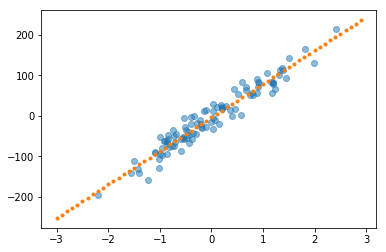

In [ ]:
%matplotlib inline



step_size = 0.1


x, y = make_regression(n_samples = 100,
                       n_features=1,
                       n_informative=1,
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')




xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=step_size)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta)
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

## Parameter Space Visualization

The blue surface represents the parameter space of all possible weights and the resulting cost.

x1 and x2 represent the weight and bias for an input.



/home/dev/BIN/anaconda3/envs/deng_ml/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


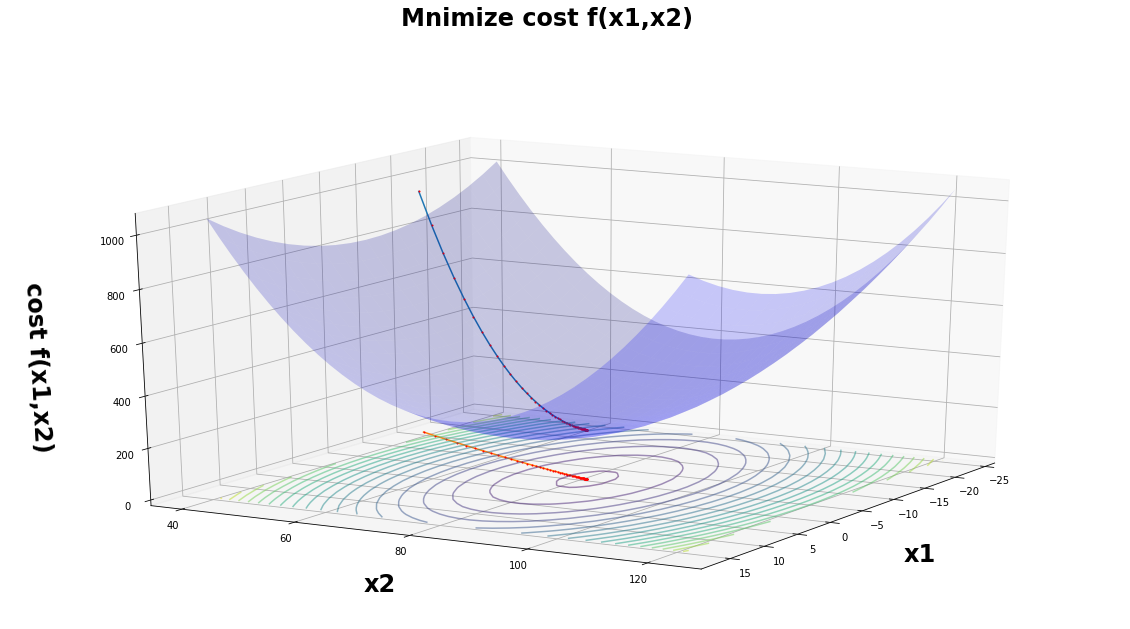

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('cost f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Mnimize cost f(x1,x2)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")